In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [8]:
mnist = keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Preprocessing Input Data

In [12]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [22]:
28*28

784

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [15]:
X_train /= 255
X_test /= 255

In [16]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
Y_train = tf.keras.utils.to_categorical(Y_train, 10)
Y_test = tf.keras.utils.to_categorical(Y_test, 10)

In [19]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [23]:
Y_train.shape

(60000, 10)

# Designing the Model

In [24]:
model1 = Sequential()

model1.add(Dense(10, input_shape=(784, ), name='Dense1', activation='softmax'))

In [25]:
model1.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [30]:
(60000-12000) / 64

750.0

In [56]:
log_dir = 'logs/fit/model1'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

training = model1.fit(X_train, Y_train, batch_size=64, epochs=50, validation_split=0.2, callbacks=tensorboard_callback)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9176 - loss: 0.2973 - val_accuracy: 0.9198 - val_loss: 0.2872
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.9187 - loss: 0.2979 - val_accuracy: 0.9199 - val_loss: 0.2869
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9177 - loss: 0.2973 - val_accuracy: 0.9197 - val_loss: 0.2865
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9183 - loss: 0.2931 - val_accuracy: 0.9207 - val_loss: 0.2860
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - accuracy: 0.9204 - loss: 0.2932 - val_accuracy: 0.9210 - val_loss: 0.2856
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9205 - loss: 0.2905 - val_accuracy: 0.9206 - val_loss: 0.2851
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.9188 - loss: 0.2928 - val_accuracy: 0.9207 - val_loss: 0.2848
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.9207 - loss: 0.2867 - 

In [31]:
import matplotlib.pyplot as plt


In [32]:
training.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [35]:
training.history['accuracy']

[0.7502291798591614,
 0.8567708134651184,
 0.8718541860580444,
 0.8787708282470703,
 0.8852291703224182,
 0.8886250257492065,
 0.8916666507720947,
 0.8940833210945129,
 0.8957499861717224,
 0.8974583148956299,
 0.8985833525657654,
 0.9001874923706055,
 0.9010000228881836,
 0.9022916555404663,
 0.9034374952316284,
 0.9044583439826965,
 0.9050416946411133,
 0.90645831823349,
 0.9071041941642761,
 0.9073333144187927,
 0.9085624814033508,
 0.9089166522026062,
 0.909458339214325,
 0.9101666808128357,
 0.9103749990463257,
 0.9112083315849304,
 0.9118333458900452,
 0.9118958115577698,
 0.9124166369438171,
 0.9126041531562805,
 0.9131041765213013,
 0.9136041402816772,
 0.9141666889190674,
 0.9144166707992554,
 0.914437472820282,
 0.9148541688919067,
 0.9153125286102295,
 0.9152291417121887,
 0.9158541560173035,
 0.9159374833106995,
 0.9163958430290222,
 0.9167500138282776,
 0.9167916774749756,
 0.917020857334137,
 0.916979193687439,
 0.9175000190734863,
 0.9175624847412109,
 0.9174791574478149

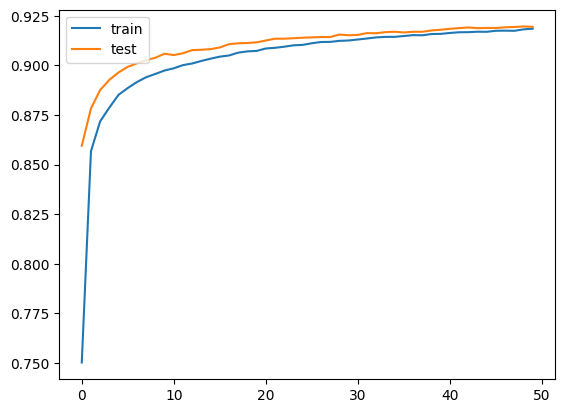

In [33]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.show()

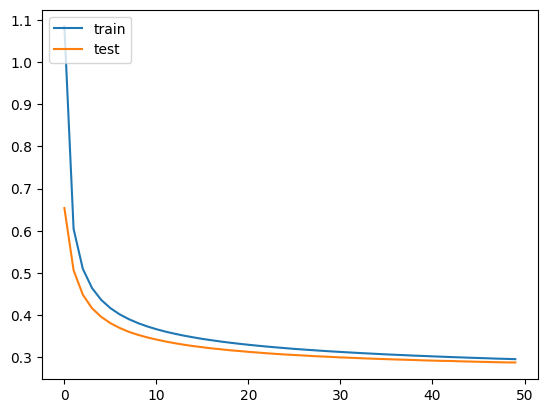

In [34]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['train','test'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


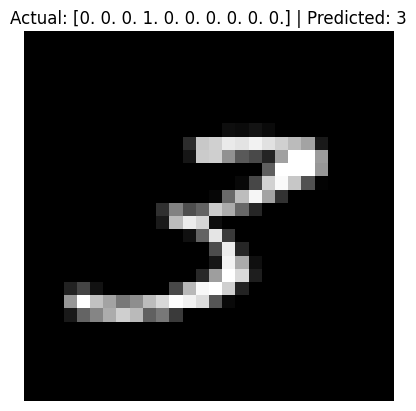

In [40]:
import random
import numpy as np
# -----------------------------
# Random prediction visualization
# -----------------------------

# Pick a random index from the test set
random_index = random.randint(0, len(X_test) - 1)

# Get the corresponding image and label
random_image = X_test[random_index]
actual_label = Y_test[random_index]

# Reshape the image for prediction (1, 784)
image_reshaped = random_image.reshape(1, 784)

# Make prediction
predicted_probs = model1.predict(image_reshaped)
predicted_label = np.argmax(predicted_probs)

# Display the image and results
plt.imshow(random_image.reshape(28, 28), cmap='gray')
plt.title(f"Actual: {actual_label} | Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Multi Layer Perceptron Model

In [44]:
model2 = Sequential()

model2.add(Dense(64, input_shape=(784, ), name = 'Hidden_Layer1', activation='relu'))

model2.add(Dense(128, name = 'Hidden_Layer2', activation='relu'))

model2.add(Dense(10, name = 'Output_layer', activation='softmax'))


In [45]:
model2.compile(optimizer='Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [46]:
log_dir = 'logs/fit/model2'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

training = model2.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.2, callbacks=tensorboard_callback)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7790 - loss: 0.7571 - val_accuracy: 0.9413 - val_loss: 0.2083
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 870us/step - accuracy: 0.9451 - loss: 0.1869 - val_accuracy: 0.9558 - val_loss: 0.1492
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9625 - loss: 0.1266 - val_accuracy: 0.9627 - val_loss: 0.1277
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9726 - loss: 0.0958 - val_accuracy: 0.9666 - val_loss: 0.1199
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.9757 - loss: 0.0817 - val_accuracy: 0.9691 - val_loss: 0.1048
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.9810 - loss: 0.0656 - val_accuracy: 0.9692 - val_loss: 0.1056
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - accuracy: 0.9842 - loss: 0.0542 - val_accuracy: 0.9697 - val_loss: 0.1083
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.9859 - loss: 0.0468 - va

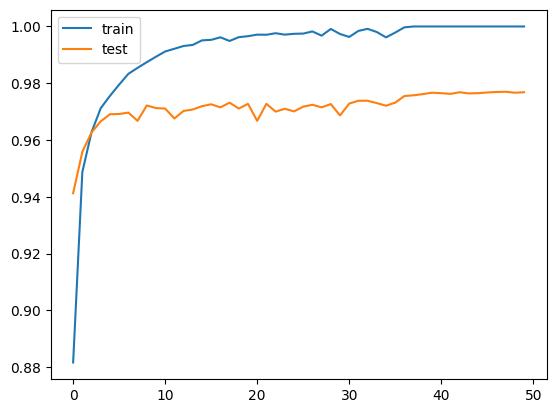

In [47]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.show()

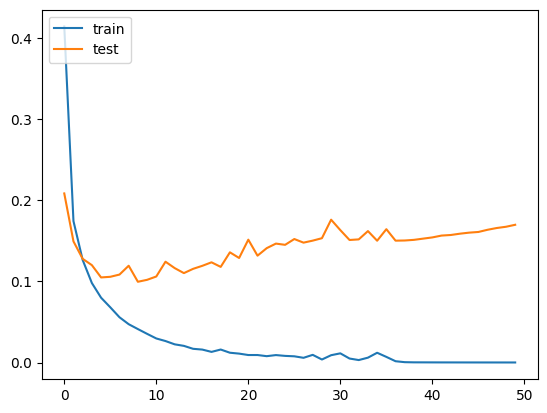

In [48]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['train','test'], loc='upper left')
plt.show()

In [49]:
model2.weights

[<Variable path=sequential_2/sequential_3/Hidden_Layer1/kernel, shape=(784, 64), dtype=float32, value=[[ 0.01927593  0.04577576  0.06886601 ... -0.02251495  0.00614677
    0.01014192]
  [ 0.05755372 -0.03693683  0.0007847  ...  0.05170699 -0.06826173
    0.04757171]
  [ 0.07332649  0.06606581 -0.02405981 ... -0.06071527  0.01568949
    0.08358365]
  ...
  [-0.0718911  -0.05328309  0.06824053 ... -0.07692526 -0.02190375
   -0.00351113]
  [ 0.07654052  0.043344    0.06489421 ... -0.03382019 -0.03030628
   -0.00450908]
  [-0.06353562 -0.07738123 -0.0785287  ...  0.01454418 -0.05943249
    0.07891973]]>,
 <Variable path=sequential_2/sequential_3/Hidden_Layer1/bias, shape=(64,), dtype=float32, value=[ 1.63985029e-01  1.29654422e-01  2.47779801e-01  4.08343710e-02
   1.73684716e-01 -3.23176309e-02  8.96767825e-02 -3.70943430e-03
   2.90543716e-02  1.19950727e-01  1.62226856e-01 -4.46303673e-02
  -1.66341856e-01  8.26841146e-02  2.35006675e-01 -9.98133942e-02
  -1.11690067e-01 -3.46034095e-02

# Multilayer Perceptron Model with Dropout Layer

In [50]:
model3 = Sequential()

model3.add(Dense(64, input_shape=(784, ), name = 'Hidden_Layer1', activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(128, name = 'Hidden_Layer2', activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(10, name = 'Output_layer', activation='softmax'))


/Users/ranjith/ENTER/envs/mlp/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
log_dir = 'logs/fit/model3'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

training = model3.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.2, callbacks=tensorboard_callback)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7137 - loss: 0.9189 - val_accuracy: 0.9410 - val_loss: 0.2019
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9195 - loss: 0.2647 - val_accuracy: 0.9552 - val_loss: 0.1545
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9403 - loss: 0.1992 - val_accuracy: 0.9605 - val_loss: 0.1292
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9493 - loss: 0.1703 - val_accuracy: 0.9653 - val_loss: 0.1174
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9558 - loss: 0.1500 - val_accuracy: 0.9659 - val_loss: 0.1155
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9589 - loss: 0.1329 - val_accuracy: 0.9688 - val_loss: 0.1035
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9620 - loss: 0.1247 - val_accuracy: 0.9706 - val_loss: 0.0981
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9651 - loss: 0.1122 - val_accuracy: 

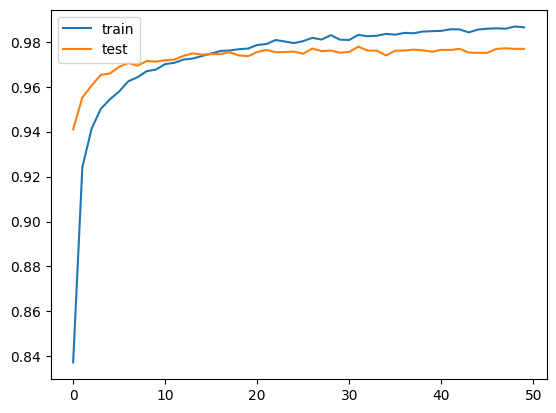

In [54]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.show()

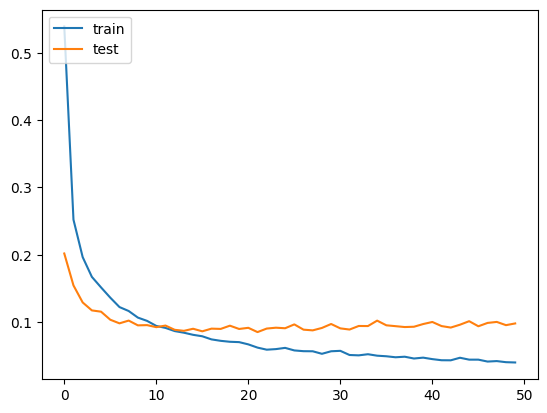

In [55]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['train','test'], loc='upper left')
plt.show()